In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
df = data.rename({'R&D Spend':'RDS','Marketing Spend':'MKTS'},axis=1)  #renaming R&D Spend as RDS and Marketing Spend as MKTS 

In [8]:
df.head()

,RDS,Administration,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df.shape

(50, 5)

In [10]:
df[df.duplicated()]

,RDS,Administration,MKTS,State,Profit


In [11]:
df.corr()

,RDS,Administration,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


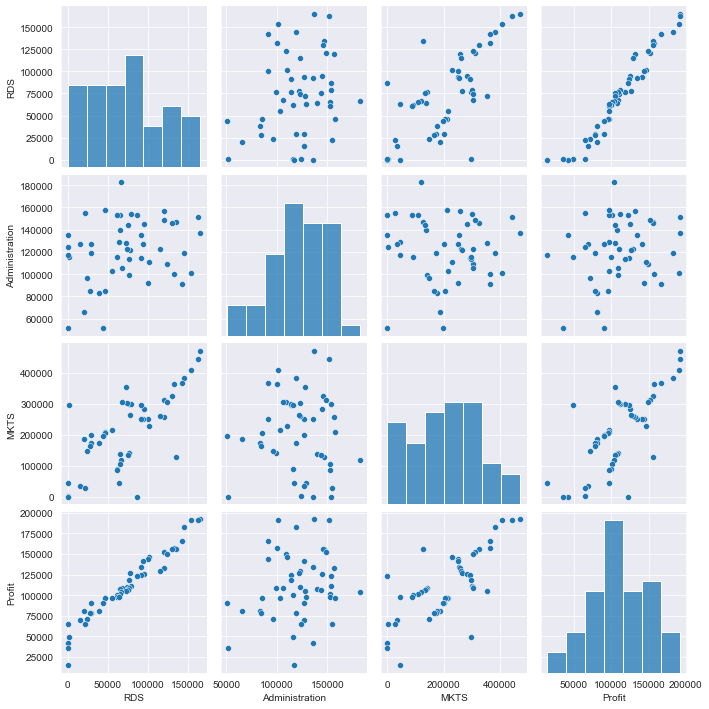

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [13]:
#model building

In [14]:
df.columns

Index(['RDS', 'Administration', 'MKTS', 'State', 'Profit'], dtype='object')

In [15]:
model = smf.ols("Profit~RDS+Administration+MKTS",data=df).fit()

In [16]:
model.params  #model parameters

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MKTS                  0.027228
dtype: float64

In [17]:
model.tvalues,    model.pvalues  # tvalues and pvalues

(Intercept          7.626218
 RDS               17.846374
 Administration    -0.525507
 MKTS               1.655077
 dtype: float64,
 Intercept         1.057379e-09
 RDS               2.634968e-22
 Administration    6.017551e-01
 MKTS              1.047168e-01
 dtype: float64)

In [18]:
# R squared values
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [19]:
# accuracy of model is 95%

In [23]:
#Building SLR and MLR models for inisignificant variables Administraion amd MKTS

In [22]:
slr_a = smf.ols('Profit~Administration',data=df).fit()

In [25]:
slr_a.tvalues,slr_a.pvalues  

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [26]:
# administration has insignificant pvalue

In [27]:
slr_m = smf.ols('Profit~MKTS',data=df).fit()

In [28]:
slr_m.tvalues,slr_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [29]:
# MKTS has significant pvalue

In [30]:
mlr_am = smf.ols('Profit~Administration+MKTS',data=df).fit()

In [31]:
mlr_am.tvalues,mlr_am.pvalues

(Intercept         1.142741
 Administration    2.467779
 MKTS              8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MKTS              9.727245e-11
 dtype: float64)

In [32]:
# here variables have significant pvalues

In [36]:
## Model Validation

In [37]:
# Collinearity Problem check

In [38]:
# calculating VIF using  VIF = 1/(1-Rsquare) for all independent variables

In [35]:
rsq_r=smf.ols("RDS~Administration+MKTS",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RDS+MKTS",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+Administration",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','Administration','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Administration,1.175091
2,MKTS,2.326773


In [39]:
# as VIF<20 , so there is no variable has collinearity, so we can consider them for model building

In [40]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) :
    return (vals-vals.mean())/vals.std() 

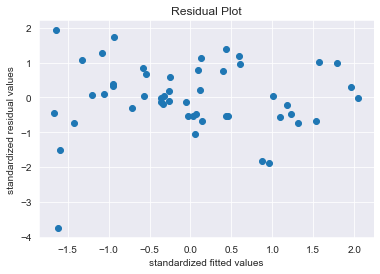

In [41]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [42]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

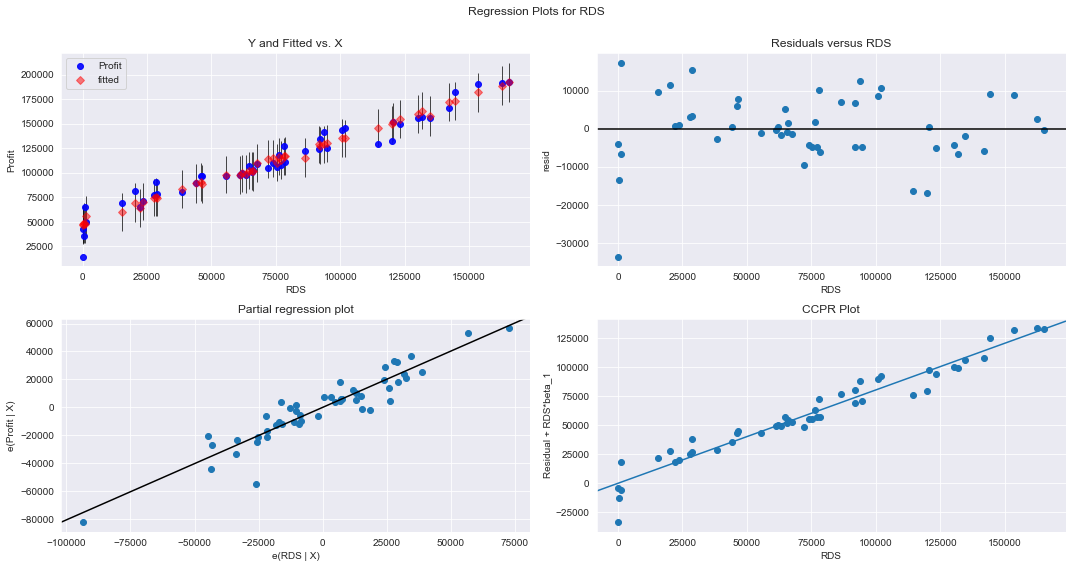

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

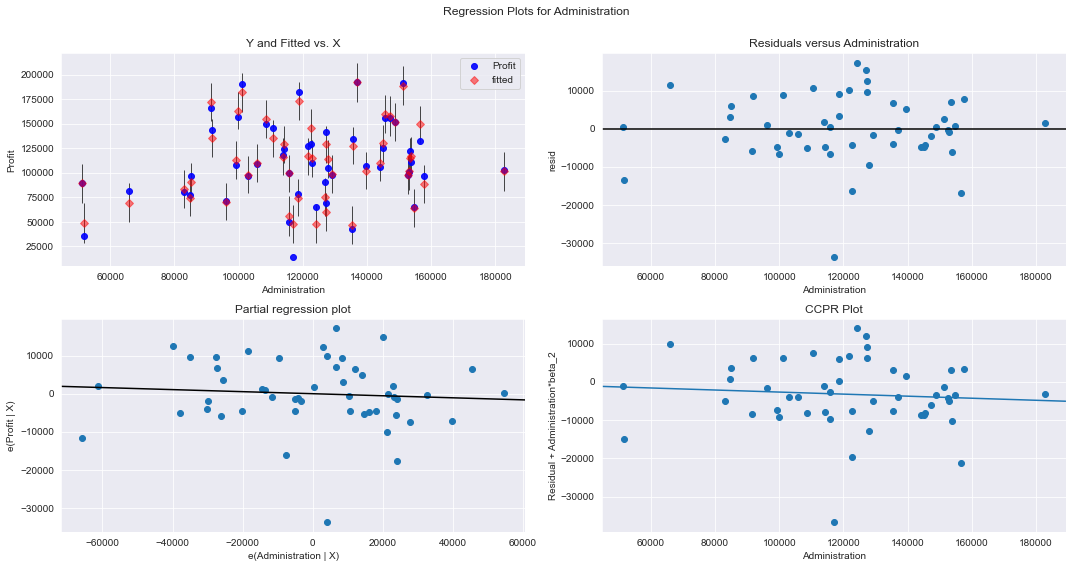

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

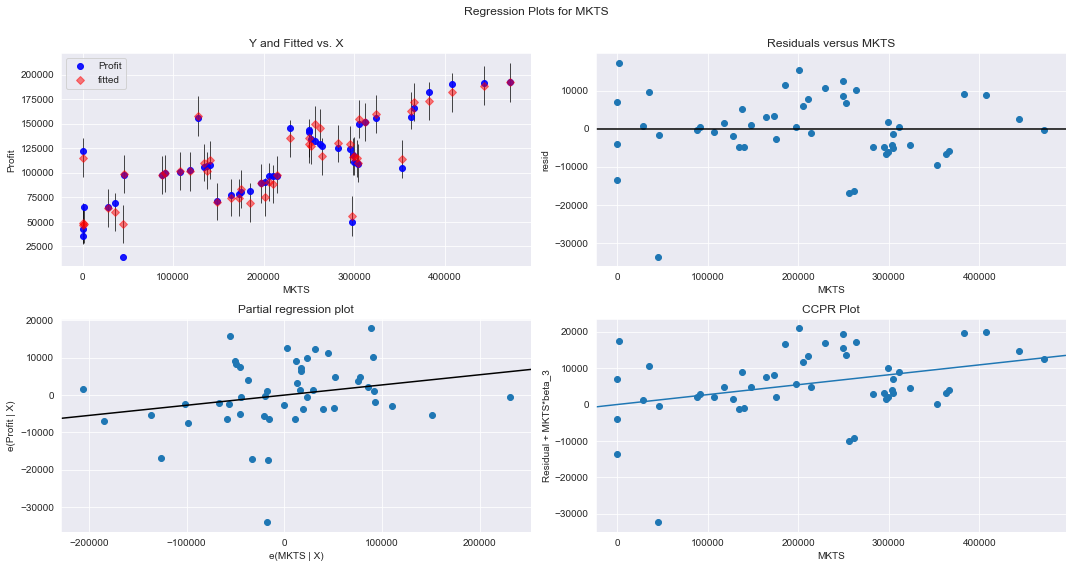

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

In [47]:
# Checking Outliers or Influencers

In [48]:
# using Cook's Distance

In [49]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

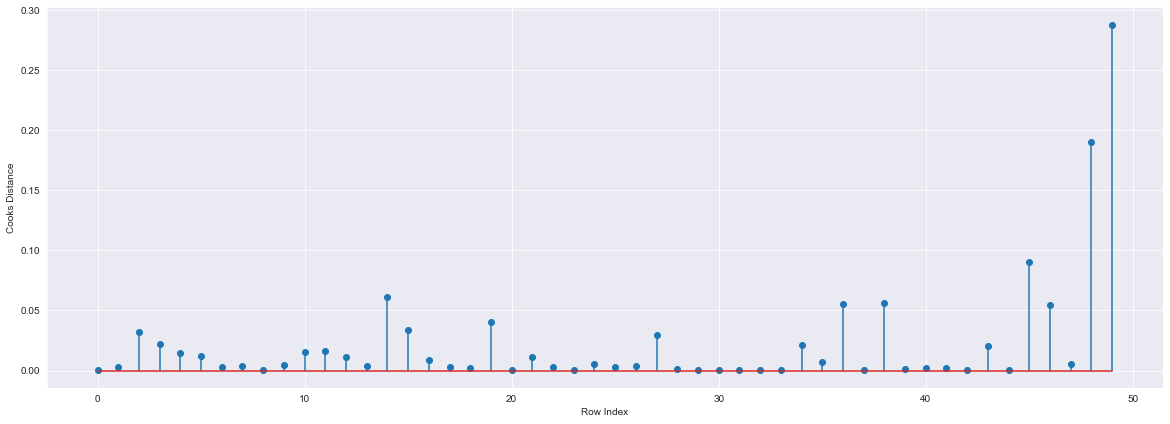

In [51]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
# Index and value of influencer where C>0.5

In [53]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432673)

In [54]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

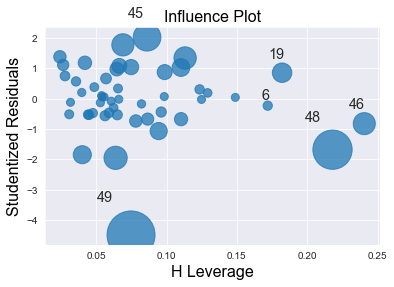

In [55]:
influence_plot(model)
plt.show()

In [57]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [60]:
df[df.index.isin([49])] 

,RDS,Administration,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [61]:
# Final Model

In [64]:
df2=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df2

,RDS,Administration,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+Administration+MKTS",data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=smf.ols("Profit~RDS+Administration+MKTS",data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [66]:
final_model.rsquared

0.9613162435129847

In [67]:
# Model accuracy is 96%

In [68]:
# Model Predictions

In [70]:
new_data=pd.DataFrame({'RDS':80000,"Administration":90000,"MKTS":160000},index=[0])
new_data

,RDS,Administration,MKTS
0,80000,90000,160000


In [71]:
final_model.predict(new_data)

0    117061.845957
dtype: float64

In [73]:
pred_y=final_model.predict(df2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [74]:
# R2 value for each model

In [75]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
